In [1]:
from model import CNN
from data_generator import DataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.misc import imresize
from scipy.ndimage import zoom

/home/nakatsuka/anaconda3/envs/tf15/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
model = CNN(input_shape=(28, 28, 1),
            nb_classes=10)
data_generator = DataGenerator(batch_size=64,
                               is_training=True,
                               flatten=False)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [3]:
model.fit(data_generator, nb_epoch=10, model_dir='./model')


epoch 1 / 10
937/938  loss : 1.2485  acc : 0.5625
epoch 2 / 10
937/938  loss : 1.3405  acc : 0.5000
epoch 3 / 10
937/938  loss : 0.5402  acc : 0.8438
epoch 4 / 10
937/938  loss : 0.6524  acc : 0.8438
epoch 5 / 10
937/938  loss : 0.7153  acc : 0.8125
epoch 6 / 10
937/938  loss : 0.5015  acc : 0.8750
epoch 7 / 10
937/938  loss : 0.3465  acc : 0.9375
epoch 8 / 10
937/938  loss : 0.3498  acc : 0.8750
epoch 9 / 10
937/938  loss : 0.5309  acc : 0.8750
epoch 10 / 10
937/938  loss : 0.3987  acc : 0.8438
Training is done ... 


In [4]:
test_generator = DataGenerator(batch_size=64,
                               is_training=False,
                               flatten=False)

In [5]:
model.evaluate_generator(test_generator)

0.9067

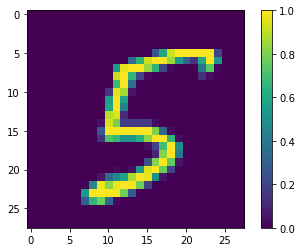

In [58]:
x, y = next(test_generator())
sampling_index = 23
_x = x[sampling_index]
_y = y[sampling_index]
_x = np.expand_dims(_x, 0)
_y = np.argmax(_y)
plt.figure()
plt.imshow(_x[0].reshape(28, 28))
plt.colorbar()

In [62]:
alpha = tf.gradients(model.logit[:, _y], model.feature_map)[0]
l = tf.nn.relu(tf.reduce_sum(alpha*model.feature_map, axis=-1))
sal = model.sess.run(l,
                     feed_dict={model.input_: x})

/home/nakatsuka/anaconda3/envs/tf15/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


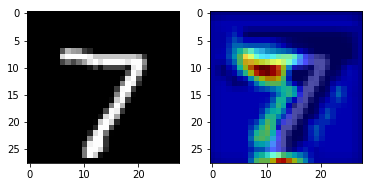

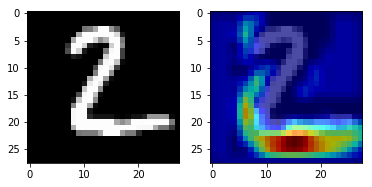

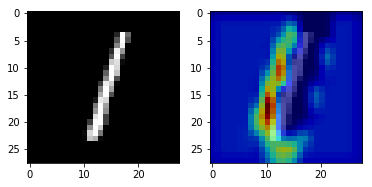

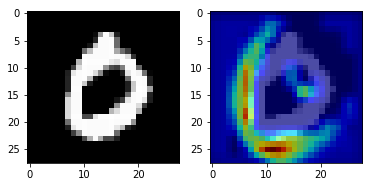

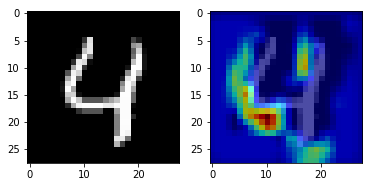

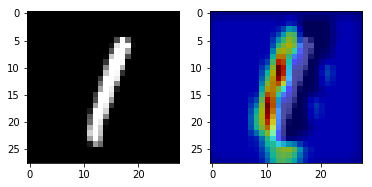

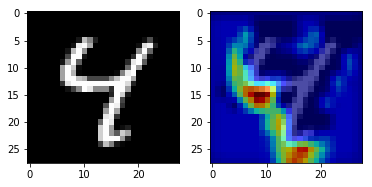

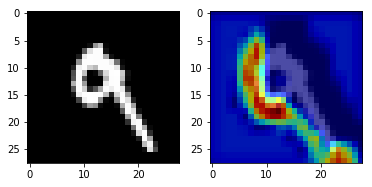

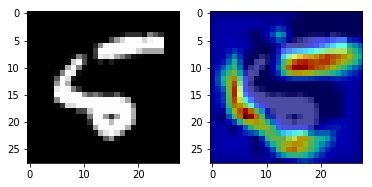

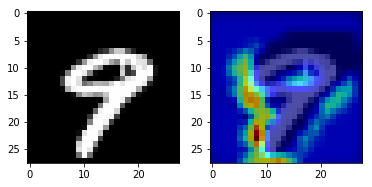

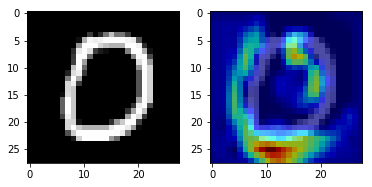

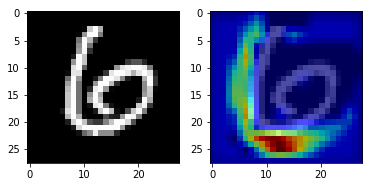

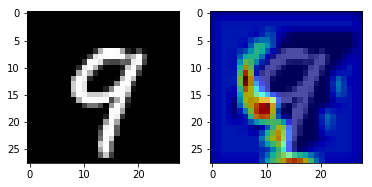

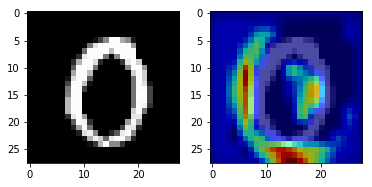

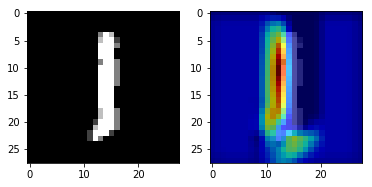

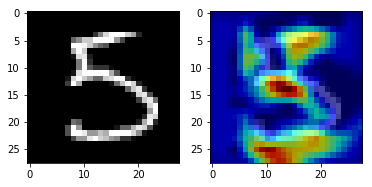

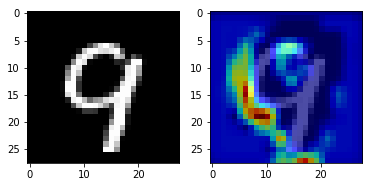

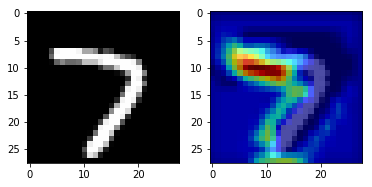

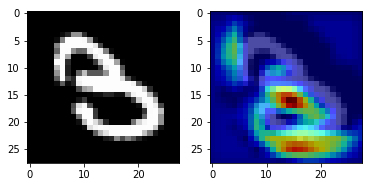

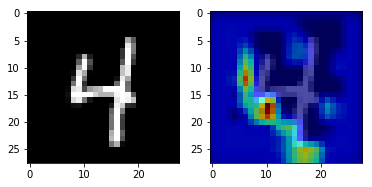

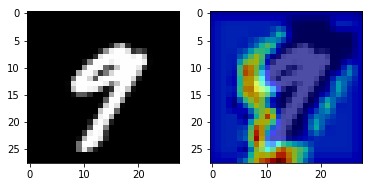

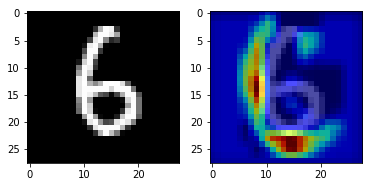

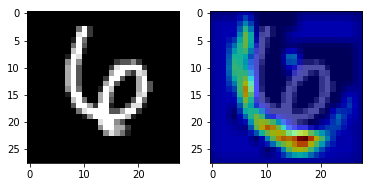

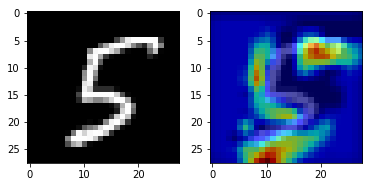

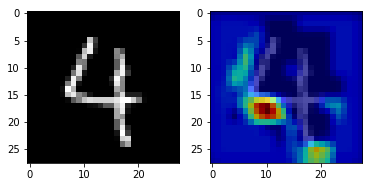

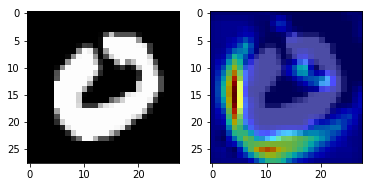

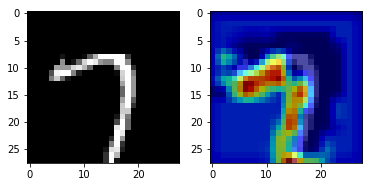

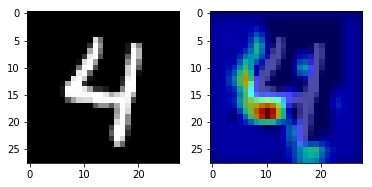

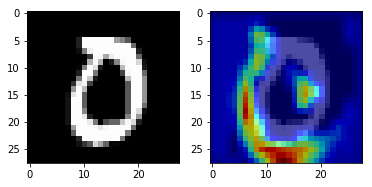

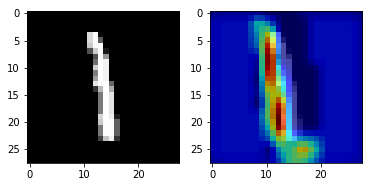

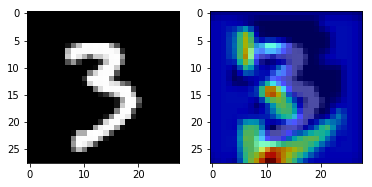

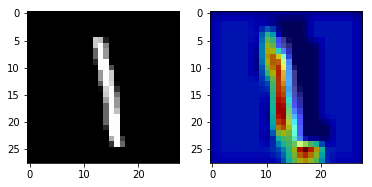

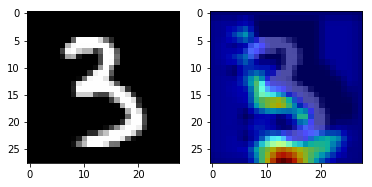

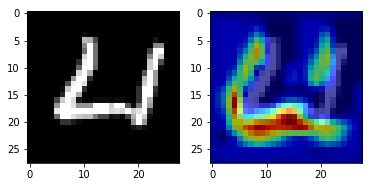

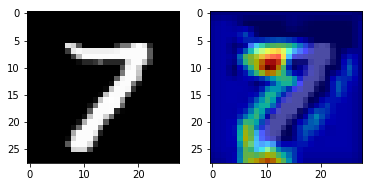

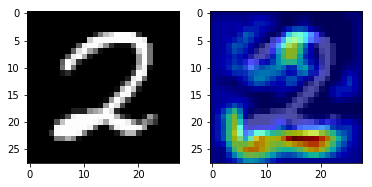

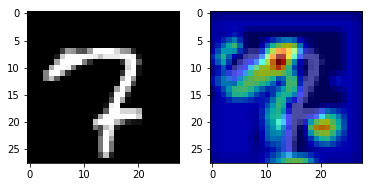

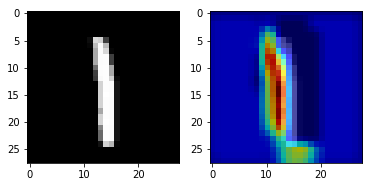

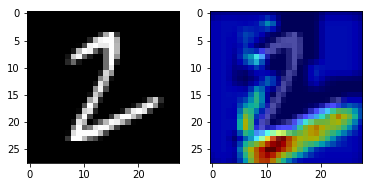

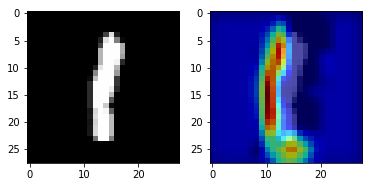

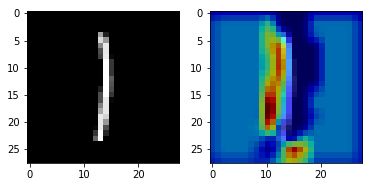

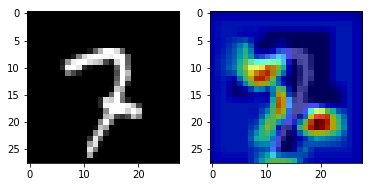

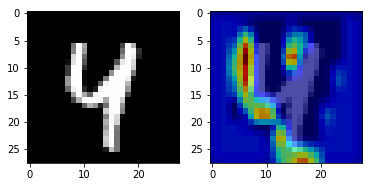

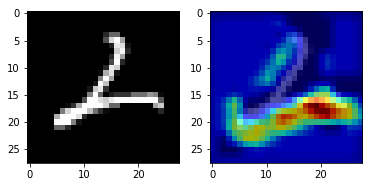

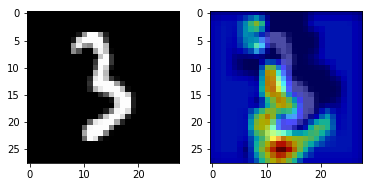

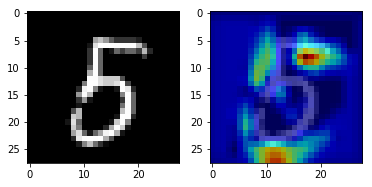

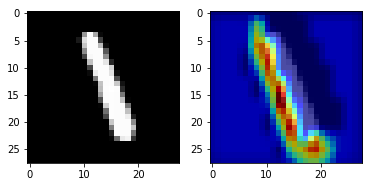

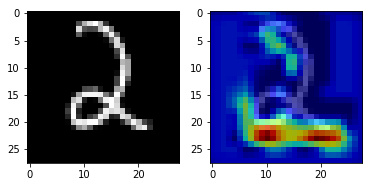

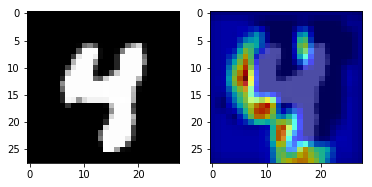

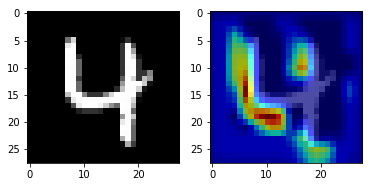

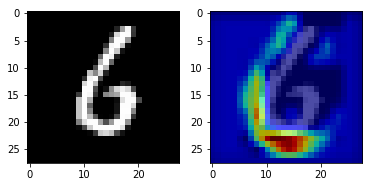

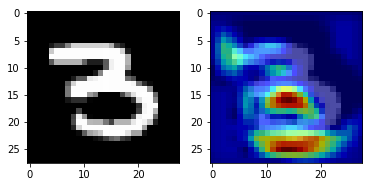

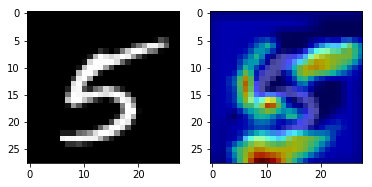

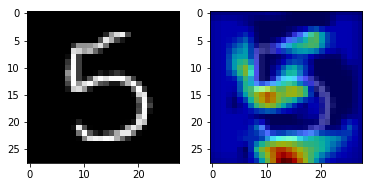

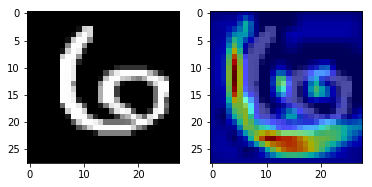

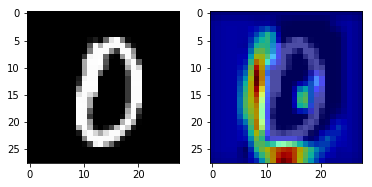

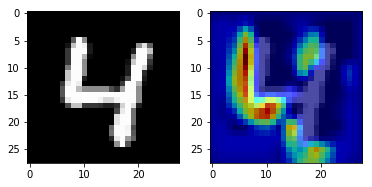

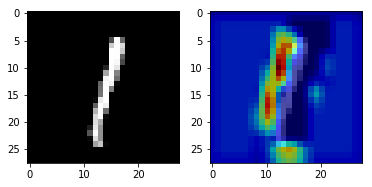

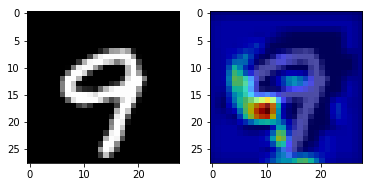

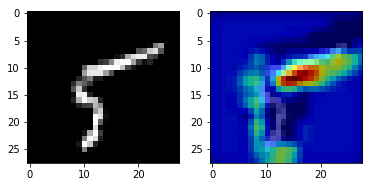

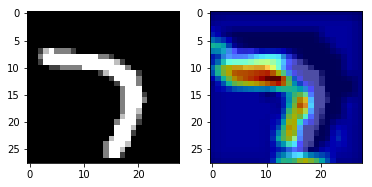

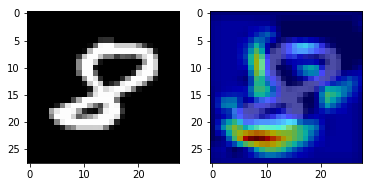

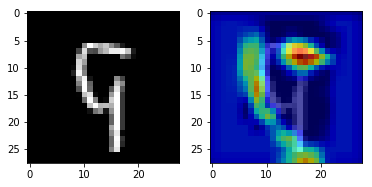

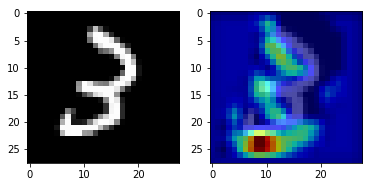

In [69]:
for __x, _sal in zip(x, sal):
    plt.figure()
    plt.subplot(121)
    plt.imshow(__x[:, :, 0], cmap='gray')
    plt.subplot(122)
    plt.imshow(__x[:, :, 0], cmap='gray')
    plt.imshow(zoom(_sal, (2, 2), order=1), cmap='jet', alpha=0.7)